## Scikit Learn Assignment Template

1.  Create an empty notebook for the assignment 
2.  Copy the cells from this template to your notebook
3.  Add your code to cells 2, 4, 5, 8, and 12  to generate (similar) results as shown in the template
4.  In cell 13, write you summary
5.  Fully excecute your notebook and submit the result 

In [1]:
#import the needed packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read in app_usage data into vpn_df

##############################################
## type your code here to create vpn dataframe
vpn_df=
##############################################

In [3]:
#oberve the data
#RemoteAccess is the target, we will build a model that 
#takes all other columns as X to predict remote VPN usage

#look at the shape of the dataframe
print(vpn_df.shape)

#look at the column names
print(vpn_df.columns)

#show the first 5 records
print(vpn_df.head(5))

(91, 11)
Index(['CRM', 'CloudDrive', 'ERP', 'Expenses', 'HR1', 'HR2', 'ITOps', 'OTHER',
       'Recruiting', 'Webmail', 'RemoteAccess'],
      dtype='object')
   CRM  CloudDrive  ERP  Expenses  HR1  HR2  ITOps  OTHER  Recruiting  \
0   49          99   17        38    0    0     18    144          33   
1  107         148   28        54    0    0     38    188          30   
2  639         796  221       216    0    0    133   1175         297   
3  653         767  203       191    0    0    139   1475         308   
4  670         738  196       140    0    0    128   1111         305   

   Webmail  RemoteAccess  
0      141           283  
1      213           430  
2      579           732  
3      549           738  
4      678           781  


[<matplotlib.text.Text at 0xad3a320>, <matplotlib.text.Text at 0xac24a90>]

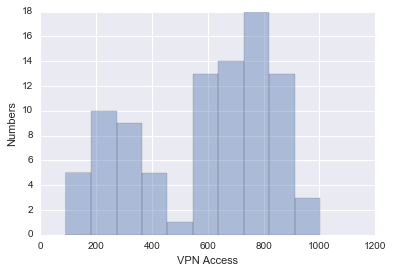

In [4]:
#Visualize data

#1. See the distribtuion of Remote VPN Access

################################################################
## Create a histogram of VPN usage close to the display below####
## the answers may vary                                 ######## 

#################################################################

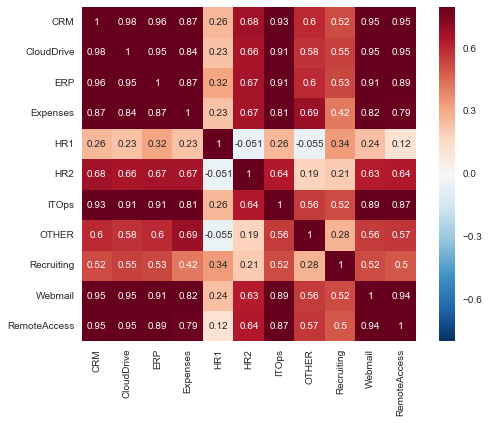

In [5]:
#2. See the correlation heat map

################################################################
## Create a correlation heatmap close to the display below  ####
## the answers may vary                                 ######## 


#################################################################


In [6]:
#We determine that this is supervised machine learning problem
#Linear Regression can be a good model
from sklearn import linear_model

In [7]:
#The function takes X, y and retrun the trained model and R squared
def train_model(X,y):
    model = linear_model.LinearRegression()
    model.fit(X, y)
    R_2 = model.score(X,y)
    return model, R_2
#create a function to calculate Adjusted R_square
# n is the number of sample, p is the number features
def cal_adjusted_R(R_2, p, n):
    R_adjusted = R_2-(1-R_2)*(p/(n-p-1))
    return R_adjusted

In [8]:
#R_2_array stores the R squared of all the features
R_2_array = np.array([])

#Calcuate the R_squared 
for col_name in vpn_df.columns:
    if col_name == 'RemoteAccess':
        continue
    else:    
        
        # add your code here: 
        ################################################################
        ## call the train_model() function to calculate R squared   ####
        
        
        #################################################################
      
        

################################################################
## sorted_R_2_index stores the index numbers of R_2_array   ####
## in descending order of the R_2 values                    ####        
sorted_R_2_index = np.argsort(R_2_array)[::-1]       
#################################################################


#print out the sorted indexes 
print("The order of index numbers are : \t", sorted_R_2_index)

CRM :         0.90306039423
CloudDrive :         0.893256772242
ERP :         0.790430112674
Expenses :         0.6232665636
HR1 :         0.0153080272537
HR2 :         0.41428585591
ITOps :         0.756620495169
OTHER :         0.326875616024
Recruiting :         0.249533227514
Webmail :         0.884781974331
The order of index numbers are : 	 [0 1 9 2 6 3 5 7 8 4]


In [9]:
#gradually build up our model and add R squared and adjusted R to the output

for i in range(len(sorted_R_2_index)):
    
    #the selected_features should be the top i most associated features
    selected_features = []
    
    #take the top 1 to ith features as X
    for j in range(i+1):
        
            #append a new column based on the sorted R value
            #take your time to digist this line
            selected_features.append(vpn_df.columns[sorted_R_2_index[j]])
            
    #verify we got the right features
    print(selected_features)
    
    # X
    X_feature = vpn_df[selected_features]
    
    # y
    target = vpn_df[['RemoteAccess']]
    
    # train the model
    model, R_2 = train_model(X_feature, target)
    
    #calculate adjusted R
    R_adjusted = cal_adjusted_R(R_2, i+1, vpn_df.shape[0])
    
    #print the output
    print("R2: ", R_2, "\t Ajusted R2: ", R_adjusted, "\n")

['CRM']
R2:  0.90306039423 	 Ajusted R2:  0.901971185177 

['CRM', 'CloudDrive']
R2:  0.907477312559 	 Ajusted R2:  0.905374524208 

['CRM', 'CloudDrive', 'Webmail']
R2:  0.916972072352 	 Ajusted R2:  0.914109040364 

['CRM', 'CloudDrive', 'Webmail', 'ERP']
R2:  0.924310482006 	 Ajusted R2:  0.920790039309 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps']
R2:  0.924504070995 	 Ajusted R2:  0.920063133994 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses']
R2:  0.926118081399 	 Ajusted R2:  0.920840801499 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2']
R2:  0.926837409066 	 Ajusted R2:  0.920667070072 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER']
R2:  0.930331823879 	 Ajusted R2:  0.923534928647 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER', 'Recruiting']
R2:  0.930507357989 	 Ajusted R2:  0.922785953321 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER', 'Recrui

In [10]:
#let's build the model with all the features

y = vpn_df['RemoteAccess']
X = vpn_df.drop('RemoteAccess', 1)

from sklearn import linear_model

#create a linear regression model from linear_model package 
model=linear_model.LinearRegression()

#Train the model with our data (X, y)
model.fit(X,y)

#Display the parameters
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

#use R squared to see how much variation is explained by the trained model
print('R_squared: \n', model.score(X,y))

Intercept: 
 168.768682735
Coefficients: 
 [ 0.78030166  0.02552479 -0.3614915  -0.22380617 -0.14305536 -0.02601244
 -0.14498212 -0.01503002  0.02986555  0.32726658]
R_squared: 
 0.93928477597


In [11]:
# Should we reduce the number of features? 
from IPython.display import IFrame
IFrame('http://abbottanalytics.blogspot.com/2004/12/find-correlated-variables-prior-to.html', width=1200, height=300)

In [12]:
# 1. after reading the above article, you decide to keep only one feature to represent 
# all the features that have correlation higher than 0.9 to it. 
##################################################################################
## modify the following code to remove the features you feel necessary
X = vpn_df.drop([], 1)
#################################################################################


# 2. we use Lasso to further penalize models with more features
from sklearn.linear_model import Lasso

# in Lasso, the score is still R squared 
best_score = 0

# Lasso has a parameter alpha used to adjust the level of penalizing the 
# number of features. A bigger alpha will produce less features. 
# We initiate the best alpha to 0 
best_alpha = 0 

# let's fine tune alpha to find the model we need 
for alpha in np.linspace(1,0.2, 1000):
    
    #create a linear regression (Lasso) model from linear_model package 
    model=Lasso(alpha=alpha,normalize=True, max_iter=1e5)

    #Train the model with our data (X, y)
    model.fit(X,y)

    #type your code here #############################################
    #Find a model that uses exactly 3 features. ######################
    #Output the score of this model (R squared) and  ################# 
    # corresponding alpha value. #####################################
    ##################################################################
 
            

print("The best R of my 3-feature model is:\t\t", best_score)
print("The alpha I used in Lasso to find my model is: \t", best_alpha)

    #use R squared to see how much variation is explained by the trained model
    #print('R_squared: \n', model.score(X,y))

The best R of my 3-feature model is:		 0.920319511226
The alpha I used in Lasso to find my model is: 	 0.507507507508


### Summarize how you eliminated some features. Which 3 features are in your model. Compare the R squared value of your model with one using all the features, explain why your model is a reasonably better model. 

In [13]:
##### Write your summary here
print("My summary:          ")
print("the 3 features in my model are:  ")

My summary:          
the 3 features in my model are:  
